In [2]:
import matplotlib.pyplot as plt
import csv

In [13]:
data_tasklet_scaling = """results_and_timings(cycles), 1, 1, 60000, 2.77179e+10, 2875.171000, 71.721000, 254.870000, 80.025000, 79198.387000, 6.425000, 389.597000
results_and_timings(cycles), 1, 2, 60000, 6.95219e+09, 2871.276000, 71.555000, 262.798000, 92.999000, 39725.739000, 6.458000, 377.566000
results_and_timings(cycles), 1, 3, 60000, 3.11702e+09, 2875.875000, 71.522000, 254.361000, 79.836000, 26716.930000, 6.488000, 386.601000
results_and_timings(cycles), 1, 4, 60000, 1.77009e+09, 2872.633000, 71.357000, 264.011000, 92.560000, 20229.888000, 6.492000, 382.962000
results_and_timings(cycles), 1, 5, 60000, 1.14069e+09, 2881.506000, 71.782000, 263.960000, 91.068000, 16296.015000, 6.418000, 383.126000
results_and_timings(cycles), 1, 6, 60000, 7.99256e+08, 2882.602000, 71.752000, 262.521000, 81.278000, 13701.916000, 6.498000, 378.533000
results_and_timings(cycles), 1, 9, 60000, 3.76585e+08, 2874.783000, 71.816000, 262.994000, 86.161000, 9683.975000, 6.454000, 380.238000
results_and_timings(cycles), 1, 12, 60000, 2.44971e+08, 2876.763000, 71.719000, 257.705000, 92.245000, 8399.371000, 6.448000, 392.402000
results_and_timings(cycles), 1, 16, 60000, 1.79954e+08, 2869.969000, 71.505000, 263.339000, 84.728000, 8226.830000, 6.423000, 385.109000
results_and_timings(cycles), 1, 20, 60000, 1.43959e+08, 2874.191000, 71.607000, 256.664000, 90.316000, 8226.608000, 6.455000, 387.487000
results_and_timings(cycles), 1, 24, 60000, 1.19965e+08, 2871.661000, 71.610000, 255.372000, 82.840000, 8226.544000, 6.404000, 388.683000"""

data_sample_scaling = """results_and_timings(cycles), 1, 16, 500, 1.51743e+06, 19.389000, 0.510000, 0.953000, 12.076000, 69.636000, 0.173000, 8.117000
results_and_timings(cycles), 1, 16, 1000, 3.00688e+06, 40.530000, 1.123000, 1.982000, 14.021000, 137.733000, 0.226000, 15.430000
results_and_timings(cycles), 1, 16, 5000, 1.5004e+07, 221.616000, 5.966000, 15.821000, 19.565000, 686.175000, 0.616000, 49.769000
results_and_timings(cycles), 1, 16, 10000, 2.99931e+07, 451.741000, 11.698000, 43.199000, 26.032000, 1371.400000, 1.109000, 80.626000
results_and_timings(cycles), 1, 16, 15000, 4.4997e+07, 691.470000, 17.480000, 64.131000, 32.975000, 2057.303000, 1.720000, 112.718000
results_and_timings(cycles), 1, 16, 30000, 8.9978e+07, 1424.676000, 35.386000, 130.829000, 45.595000, 4113.609000, 3.318000, 200.103000
results_and_timings(cycles), 1, 16, 60000, 1.79954e+08, 2881.677000, 71.879000, 261.937000, 82.237000, 8226.833000, 6.371000, 382.901000"""

data_dpu_weak_scaling = """results_and_timings(cycles), 256, 16, 803328, 2.88879e+07, 195.537000, 1320.751000, 3.103000, 4588.656000
results_and_timings(cycles), 512, 16, 1606656, 2.89023e+07, 368.137000, 1321.471000, 6.786000, 9229.043000
results_and_timings(cycles), 1024, 16, 3213312, 2.88996e+07, 514.246000, 1321.301000, 9.323000, 19424.792000
results_and_timings(cycles), 1536, 16, 4819968, 2.89015e+07, 563.340000, 1321.510000, 10.638000, 27741.145000
results_and_timings(cycles), 2000, 16, 6276000, 2.89037e+07, 726.026000, 1321.545000, 13.347000, 36081.977000"""

data_dpu_strong_scaling = """results_and_timings(cycles), 256, 16, 8000000, 2.85802e+08, 1889.246000, 13065.513000, 33.653000, 48069.097000
results_and_timings(cycles), 512, 16, 8000000, 1.43028e+08, 1924.296000, 6538.660000, 33.696000, 45147.154000
results_and_timings(cycles), 1024, 16, 8000000, 7.16162e+07, 1150.399000, 3274.079000, 24.941000, 45959.007000
results_and_timings(cycles), 1536, 16, 8000000, 4.78118e+07, 1025.898000, 2185.888000, 17.324000, 46076.431000
results_and_timings(cycles), 2000, 16, 8000000, 3.67644e+07, 931.174000, 1680.909000, 17.245000, 48078.191000"""

In [14]:
descr_col = 0
dpu_col = 1
tasklet_col = 2
samples_col = 3
col_types = [str, int, int, int]

cycles_total_col = 4
col_types += [float]

t_transfer1_col = 5
t_dpu_col = 6
t_transfer2_col = 7
t_cpu_col = 8
col_types += [float, float, float, float]

In [15]:
def print_csv(csv_parsed):
    for row in csv_parsed:
        print(row)

In [16]:
def selectColumn(csv_parsed, column):
    return [row[column] for row in csv_parsed]

In [17]:
def cast_csv(csv_parsed, col_types):
    for row in csv_parsed:
        for i in range(len(row)):
            row[i] = col_types[i](row[i])

def parse_csv(csv_string, types=col_types):
    parsed = list(csv.reader(csv_string.splitlines(), delimiter=','))
    cast_csv(parsed, types)
    return parsed

In [18]:
# data_tasklet_scaling_csv = parse_csv(data_tasklet_scaling)
# data_sample_scaling_csv = parse_csv(data_sample_scaling)
data_dpu_strong_scaling_csv = parse_csv(data_dpu_strong_scaling)
data_dpu_weak_scaling_csv = parse_csv(data_dpu_weak_scaling)

In [11]:
tasklet_scaling_x = selectColumn(data_tasklet_scaling_csv, tasklet_col)
tasklet_scaling_cycles = selectColumn(data_tasklet_scaling_csv, cycles_col)

tasklet_scaling_transfer1_time = selectColumn(data_tasklet_scaling_csv, t_transfer1_col)
tasklet_scaling_dpu_time = selectColumn(data_tasklet_scaling_csv, t_dpu_col)
tasklet_scaling_transfer2_time = selectColumn(data_tasklet_scaling_csv, t_transfer2_col)

tasklet_scaling_cpu_time = selectColumn(data_tasklet_scaling_csv, t_cpu_col)

NameError: name 'data_tasklet_scaling_csv' is not defined

In [ ]:
sample_scaling_x = selectColumn(data_sample_scaling_csv, samples_col)
sample_scaling_cycles = selectColumn(data_sample_scaling_csv, cycles_col)

sample_scaling_transfer1_time = selectColumn(data_sample_scaling_csv, t_transfer1_col)
sample_scaling_dpu_time = selectColumn(data_sample_scaling_csv, t_dpu_col)
sample_scaling_transfer2_time = selectColumn(data_sample_scaling_csv, t_transfer2_col)

sample_scaling_cpu_time = selectColumn(data_sample_scaling_csv, t_cpu_col)

In [35]:
dpu_strong_scaling_x = selectColumn(data_dpu_strong_scaling_csv, dpu_col)

dpu_strong_scaling_cycles_total = selectColumn(data_dpu_strong_scaling_csv, cycles_total_col)

dpu_strong_scaling_transfer1_time = selectColumn(data_dpu_strong_scaling_csv, t_transfer1_col)
dpu_strong_scaling_dpu_time = selectColumn(data_dpu_strong_scaling_csv, t_dpu_col)
dpu_strong_scaling_transfer2_time = selectColumn(data_dpu_strong_scaling_csv, t_transfer2_col)

dpu_strong_scaling_cpu_time = selectColumn(data_dpu_strong_scaling_csv, t_cpu_col)

dpu_strong_scaling_speedup = [cpu_time / dpu_time for cpu_time, dpu_time in zip(dpu_strong_scaling_cpu_time, dpu_strong_scaling_dpu_time)]


In [36]:
dpu_weak_scaling_x = selectColumn(data_dpu_weak_scaling_csv, dpu_col)

dpu_weak_scaling_cycles_total = selectColumn(data_dpu_weak_scaling_csv, cycles_total_col)

dpu_weak_scaling_transfer1_time = selectColumn(data_dpu_weak_scaling_csv, t_transfer1_col)
dpu_weak_scaling_dpu_time = selectColumn(data_dpu_weak_scaling_csv, t_dpu_col)
dpu_weak_scaling_transfer2_time = selectColumn(data_dpu_weak_scaling_csv, t_transfer2_col)

dpu_weak_scaling_cpu_time = selectColumn(data_dpu_weak_scaling_csv, t_cpu_col)

dpu_weak_scaling_speedup = [cpu_time / dpu_time for cpu_time, dpu_time in zip(dpu_weak_scaling_cpu_time, dpu_weak_scaling_dpu_time)]

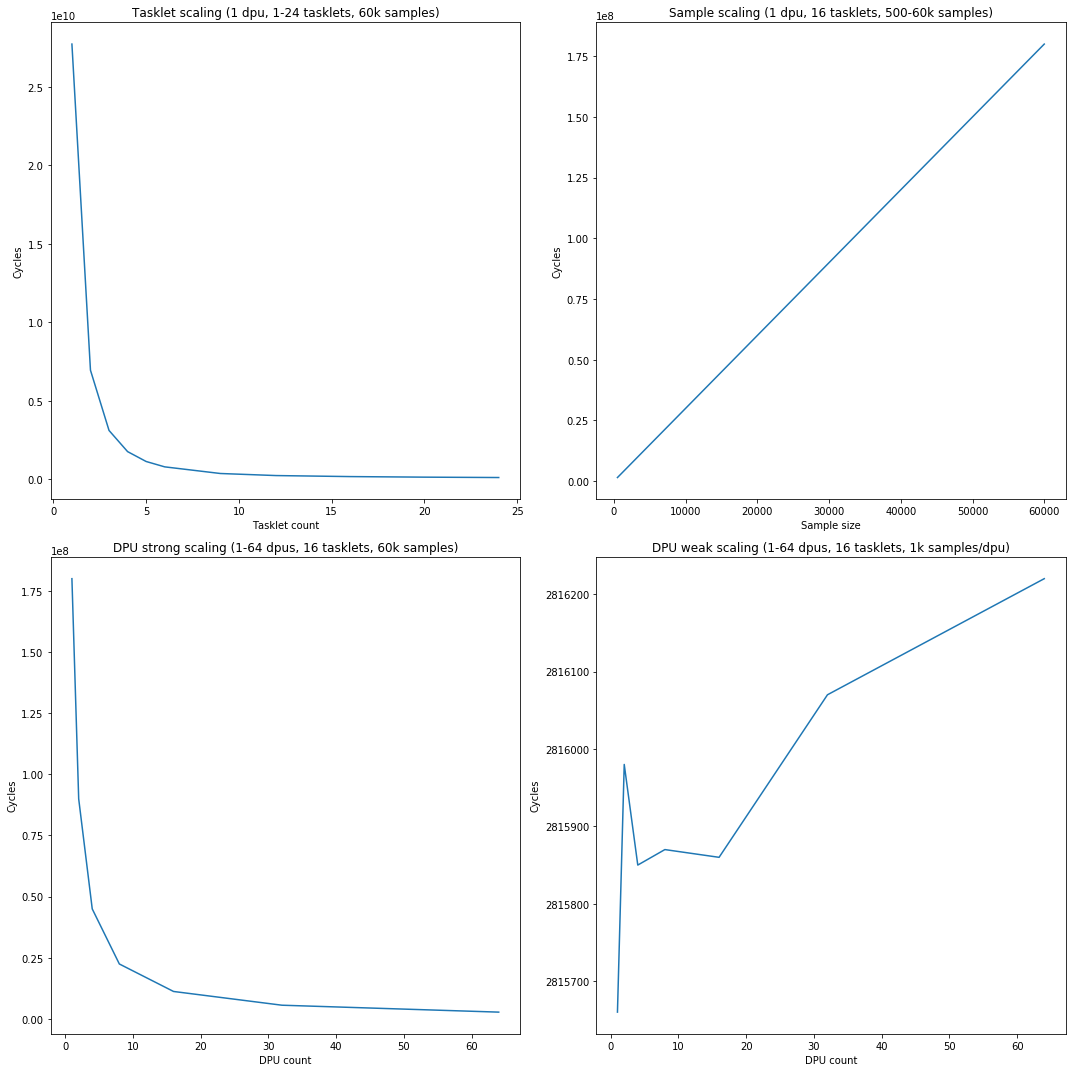

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax1, ax2, ax3, ax4 = axes.flat

ax1.plot(tasklet_scaling_x, tasklet_scaling_cycles)

ax1.set_xlabel("Tasklet count")
ax1.set_ylabel("Cycles")

ax1.set_title("Tasklet scaling (1 dpu, 1-24 tasklets, 60k samples)")

ax2.plot(sample_scaling_x, sample_scaling_cycles)

ax2.set_xlabel("Sample size")
ax2.set_ylabel("Cycles")

ax2.set_title("Sample scaling (1 dpu, 16 tasklets, 500-60k samples)")

ax3.plot(dpu_strong_scaling_x, dpu_strong_scaling_cycles)

ax3.set_xlabel("DPU count")
ax3.set_ylabel("Cycles")

ax3.set_title("DPU strong scaling (1-64 dpus, 16 tasklets, 60k samples)")

ax4.plot(dpu_weak_scaling_x, dpu_weak_scaling_cycles)

ax4.set_xlabel("DPU count")
ax4.set_ylabel("Cycles")

ax4.set_title("DPU weak scaling (1-64 dpus, 16 tasklets, 1k samples/dpu)")

fig.tight_layout()

fig.savefig('wnn_analysis.png')

plt.show()

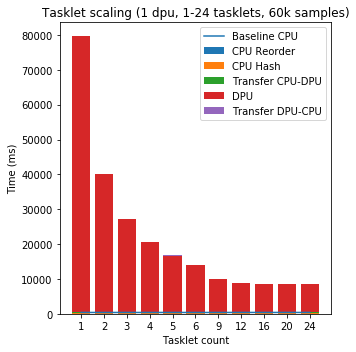

In [ ]:
# Make a barchart of the tasklet scaling timings, to show the composition of the total time it takes

fig, ax = plt.subplots(figsize=(5, 5))

str_x = [str(x) for x in tasklet_scaling_x]

start = 1
components = [
    tasklet_scaling_binarize_time,
    tasklet_scaling_reorder_time,
    tasklet_scaling_hash_time,
    tasklet_scaling_transfer1_time,
    tasklet_scaling_dpu_time,
    tasklet_scaling_transfer2_time
][start:]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, (component, label) in enumerate(zip(components, labels)):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=label, bottom=components_before)
ax.plot(str_x, tasklet_scaling_cpu_time, label="Baseline CPU")

ax.set_xticks(str_x)

ax.set_xlabel("Tasklet count")
ax.set_ylabel("Time (ms)")

ax.set_title("Tasklet scaling (1 dpu, 1-24 tasklets, 60k samples)")

ax.legend()

fig.tight_layout()

fig.savefig('tasklet_scaling_time.png')

plt.show()


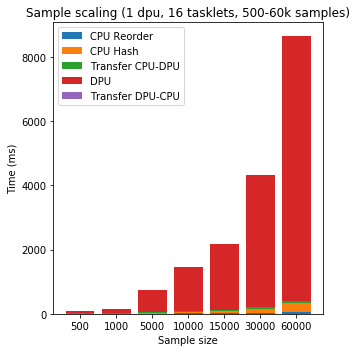

In [ ]:
# Same as above but for sample scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.7
str_x = [str(x) for x in sample_scaling_x]

start = 1
components = [
    sample_scaling_binarize_time,
    sample_scaling_reorder_time,
    sample_scaling_hash_time,
    sample_scaling_transfer1_time,
    sample_scaling_dpu_time,
    sample_scaling_transfer2_time
][start:]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=labels[i], bottom=components_before)


ax.set_xticks(str_x)

ax.set_xlabel("Sample size")
ax.set_ylabel("Time (ms)")

ax.set_title("Sample scaling (1 dpu, 16 tasklets, 500-60k samples)")

ax.legend()

fig.tight_layout()

fig.savefig('sample_scaling_time.png')

plt.show()


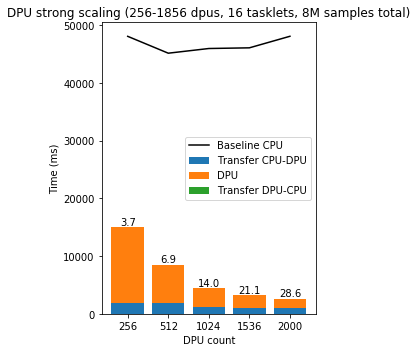

In [49]:
# Same as above but for dpu strong scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.75
str_x = [str(x) for x in dpu_strong_scaling_x]
start = 0
components = [
    dpu_strong_scaling_transfer1_time,
    dpu_strong_scaling_dpu_time,
    dpu_strong_scaling_transfer2_time
][start:]
labels = [
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    bar = ax.bar(str_x, component, label=labels[i], bottom=components_before)
    if(i == len(components) - 1):
        for j, (bar_j, speedup) in enumerate(zip(bar, dpu_strong_scaling_speedup)):
            h = components_before[j] + component[j]
            ax.text(j, h + 10, str(round(speedup, 1)), ha='center', va='bottom')



ax.plot(str_x, dpu_strong_scaling_cpu_time, label="Baseline CPU", color="black")

ax.set_xticks(str_x)

ax.set_xlabel("DPU count")
ax.set_ylabel("Time (ms)")

ax.set_title("DPU strong scaling (256-1856 dpus, 16 tasklets, 8M samples total)")

ax.legend()

fig.tight_layout()

fig.savefig('dpu_strong_scaling_time.png')

plt.show()  

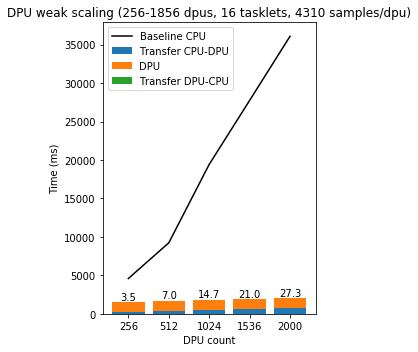

In [47]:
# Same as above but for dpu weak scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.7
str_x = [str(x) for x in dpu_weak_scaling_x]

start = 0
components = [
    dpu_weak_scaling_transfer1_time,
    dpu_weak_scaling_dpu_time,
    dpu_weak_scaling_transfer2_time
][start:]
labels = [
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=labels[i], bottom=components_before)

    if(i == len(components) - 1):
        for j, (bar_j, speedup) in enumerate(zip(bar, dpu_weak_scaling_speedup)):
            h = components_before[j] + component[j]
            ax.text(j, h + 10, str(round(speedup, 1)), ha='center', va='bottom')


ax.plot(str_x, dpu_weak_scaling_cpu_time, label="Baseline CPU", color="black")

ax.set_xticks(str_x)

ax.set_xlabel("DPU count")
ax.set_ylabel("Time (ms)")

ax.set_title("DPU weak scaling (256-1856 dpus, 16 tasklets, 4310 samples/dpu)")

ax.legend()

fig.tight_layout()

fig.savefig('dpu_weak_scaling_time.png')

plt.show()

In [2]:
class DatasetConstraints:
    def __init__(self, dataset_name, dataset_samples):
        self.dataset_name = dataset_name
        self.dataset_samples = dataset_samples

In [3]:
class DPUConstraints:
    def __init__(self, mram_b, wram_b):
        self.mram_b = mram_b
        self.wram_b = wram_b

In [4]:
class TypeParams:
    def __init__(self, filter_entry_bytes, hash_param_bytes, hash_bytes, input_bytes, order_bytes, popcount_bytes):
        self.filter_entry_bytes = filter_entry_bytes
        self.hash_param_bytes = hash_param_bytes
        self.hash_bytes = hash_bytes
        self.input_bytes = input_bytes
        self.order_bytes = order_bytes
        self.popcount_bytes = popcount_bytes

In [5]:
class Params:
    def __init__(self, type_params, dpu_constraints, dataset_constraints, num_inputs, bits_per_input, num_classes, filter_inputs, filter_entries, filter_hashes, packed, block_size_div):
        self.type_params = type_params
        self.dpu_constraints = dpu_constraints
        self.dataset_constraints = dataset_constraints

        self.num_inputs = num_inputs
        self.bits_per_input = bits_per_input
        self.num_inputs_total = num_inputs * bits_per_input
        self.num_classes = num_classes
        self.filter_inputs = filter_inputs
        self.filter_entries = filter_entries
        self.filter_hashes = filter_hashes

        self.num_filters = self.num_inputs_total // filter_inputs

        self.packed = packed
        if block_size_div == 0:
            self.block_size = 0
            self.block_size_div = 0
        else:
            self.block_size = (self.num_inputs * self.bits_per_input) // block_size_div
            self.block_size_div = block_size_div

    # MODEL SIZE RELATED

    def single_filter_size(self):
        if self.packed:
            return self.filter_entries // 8
        else:
            return self.filter_entries
    
    def single_filter_bytes(self):
        return self.single_filter_size() * self.type_params.filter_entry_bytes

    def filter_size(self):
        return self.num_classes * self.num_filters * self.single_filter_size()
    
    def filter_bytes(self):
        return self.filter_size() * self.type_params.filter_entry_bytes
    
    def hash_param_size(self):            
        return self.filter_inputs * self.filter_hashes
    
    def hash_param_bytes(self):
        return self.hash_param_size() * self.type_params.hash_param_bytes
    
    def order_size(self):
        return self.num_inputs_total
    
    def order_bytes(self):
        return self.order_size() * self.type_params.order_bytes
    
    def total_model_bytes(self):
        return self.filter_bytes() + self.hash_param_bytes() + self.order_bytes()
    
    # INFERENCE RELATED

    def hashes_size(self):
        if self.block_size_div > 0:
            return (self.num_filters / self.block_size_div) * self.filter_hashes
        else:
            return self.num_filters * self.filter_hashes
    
    def hashes_bytes(self):
        return self.hashes_size() * self.type_params.hash_bytes
    
    def input_size(self):
        if self.block_size > 0:
            return self.block_size
        else:
            return self.num_inputs_total
    
    def input_bytes(self):
        return self.input_size() * self.type_params.input_bytes
    
    def runtime_order_size(self):
        if self.block_size > 0:
            return self.block_size
        else:
            return self.num_inputs_total
        
    def runtime_order_bytes(self):
        return self.runtime_order_size() * self.type_params.order_bytes
    
    def runtime_min_filter_count(self):
        if self.block_size > 0:
            return self.num_filters // self.block_size_div
        else:
            return 0
        
    def runtime_min_filter_bytes(self):
        return self.runtime_min_filter_count() * self.single_filter_bytes()
    
    def popcount_size(self):
        return self.num_classes
    
    def popcount_bytes(self):
        return self.popcount_size() * self.type_params.popcount_bytes
    
    # DPU RELATED

    def dpu_num_samples(self):
        return (self.dpu_constraints.mram_b - self.total_model_bytes()) // self.input_bytes()
    
    def num_dpus(self):
        return self.dataset_constraints.dataset_samples // self.dpu_num_samples()
    
    def num_dpus_per_model(self):
        return (self.num_classes * self.num_filters) // self.runtime_min_filter_count()
    
    # PRINTING EVERYTHING NICELY

    def get_bytes(self, bytes):
        # Print so that it's easy to read
        if bytes < 1024:
            return "{} B".format(bytes)
        elif bytes < 1024**2:
            return "{} KB".format(round(bytes / 1024, 1))
        elif bytes < 1024**3:
            return "{} MB".format(round(bytes / 1024**2, 1))
        elif bytes < 1024**4:
            return "{} GB".format(round(bytes / 1024**3, 1))


    def print_all(self):
        print("DPU TRANSFERS:")
        print("\tModel: {} (Order: {}, Hash Params: {}, Filters: {})".format(self.get_bytes(self.total_model_bytes()), self.get_bytes(self.order_bytes()), self.get_bytes(self.hash_param_bytes()), self.get_bytes(self.filter_bytes())))
        print("\tSamples: {}".format(self.dpu_num_samples()))
        print("\tNR_DPUS: {}".format(self.num_dpus()))
        print("\tNR_DPUS_PER_MODEL: {}".format(self.num_dpus_per_model()))

        print("\nDPU BUFFERS:")
        print("\tBlock size: {} (// {})".format(self.block_size, self.block_size_div))
        print("\tRemapping")
        print("\t\tInput: {} ({})".format(self.get_bytes(self.input_bytes()), self.input_size()))
        print("\t\tOrder: {} ({})".format(self.get_bytes(self.runtime_order_bytes()), self.runtime_order_size()))
        
        print("\tHashing")
        print("\t\tHash params: {} ({})".format(self.get_bytes(self.hash_param_bytes()), self.hash_param_size()))
        print("\t\tHashes: {} ({})".format(self.get_bytes(self.hashes_bytes()), self.hashes_size()))

        print("\tFiltering")
        print("\t\tFilter: {} ({} filters)".format(self.get_bytes(self.runtime_min_filter_bytes()), self.runtime_min_filter_count()))

        print("\tReduction")
        print("\t\tPopcount: {}, ({})".format(self.get_bytes(self.popcount_bytes()), self.popcount_size()))   



In [8]:
dataset_constr = DatasetConstraints(
    dataset_name = "MNIST",
    dataset_samples = 8_100_000
)

dpu_constr = DPUConstraints(
    mram_b = 64 * (1024**2), # 64 MB
    wram_b = 64 * 1024 # 64 KB
)

type_params = TypeParams(
    filter_entry_bytes = 1,
    hash_param_bytes = 2,
    hash_bytes = 2,
    input_bytes = 1,
    order_bytes = 2,
    popcount_bytes = 2,
)

p = Params(
    type_params = type_params,
    dpu_constraints = dpu_constr,
    dataset_constraints = dataset_constr,
    
    num_inputs = 784,
    bits_per_input = 2,
    num_classes = 2,
    filter_inputs = 28,
    filter_entries = 512,
    filter_hashes = 2,
    packed = True,
    block_size_div = 12
)

In [9]:
p.print_all()

DPU TRANSFERS:
	Model: 10.2 KB (Order: 3.1 KB, Hash Params: 112 B, Filters: 7.0 KB)
	Samples: 516141
	NR_DPUS: 15
	NR_DPUS_PER_MODEL: 28

DPU BUFFERS:
	Block size: 130 (// 12)
	Remapping
		Input: 130 B (130)
		Order: 260 B (130)
	Hashing
		Hash params: 112 B (56)
		Hashes: 18.666666666666668 B (9.333333333333334)
	Filtering
		Filter: 256 B (4 filters)
	Reduction
		Popcount: 4 B, (2)
